# Project: Investigate a Dataset - [European Soccer Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conc">Conclusions</a></li>    
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description

> This soccer database comes from Kaggle is well suited for data analysis. It contains data for soccer matches, players, and teams from several European countries (11 Countries) from 2008 to 2016.

> The dataset consists of 7 tables as following:

    1- Matches (contains all data for matches within the period described above i.e. Line-ups, scores, home and away teams)
    2- Country (specifies the 11 European countries that their data are being analyzed)
    3- League (lists the league in each country)
    4- Player (contains all the personal data of the players in consideration)
    5- player Attributes (contains all soccer related skills for each player)
    6- Team (Contains all teams' names from all the leagues in consideration)
    7- Team Attributes (Contains all teams' attributes and properties from all the leagues in consideration)


### Question(s) for Analysis
> The questions will be asked during this analysis will be regarding the influence of physical properties of each player over his skills alongside with the age.

> Also, the skills linked to each other are investigated.

#### Getting Started
> Let's get started at first with importing the necessary packages for the analysis process

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


### Data Cleaning
> As shown, no null data is present. Moving on with searching for duplicated values


In [ ]:
df_players.duplicated().sum()

0

No duplicated values are present which is awesome

In [ ]:
#Now, let's explore the data more in depth
df_players.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


As shown the birthdays data need to be converted to date time type in order to get the ages of each player out of them

In [ ]:
df_players['birthday'] = pd.to_datetime(df_players['birthday'])
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11060 non-null  int64         
 1   player_api_id       11060 non-null  int64         
 2   player_name         11060 non-null  object        
 3   player_fifa_api_id  11060 non-null  int64         
 4   birthday            11060 non-null  datetime64[ns]
 5   height              11060 non-null  float64       
 6   weight              11060 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 605.0+ KB


In [ ]:
#Now, let's add the "current age" column in order to facilitate operation on and visualization
df_players.insert(5, "current_age",2021-df_players.birthday.dt.year)
df_players.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,current_age,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29,29,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15,32,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13,30,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08,39,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08,42,182.88,154


In [ ]:
#Now let's explore player's attributes dataset
df_player_att=pd.read_csv('Player_Attributes.csv')
df_player_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

As shown there are some null values in the players' attributes dataset. But we will get to that shortly.

In [ ]:
#Now let's merge both players and players attributes datasets together
df_players_combined = df_players.merge(df_player_att, left_on='player_api_id', right_on='player_api_id', how='outer')
df_players_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 0 to 183977
Data columns (total 49 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id_x                  183978 non-null  int64         
 1   player_api_id         183978 non-null  int64         
 2   player_name           183978 non-null  object        
 3   player_fifa_api_id_x  183978 non-null  int64         
 4   birthday              183978 non-null  datetime64[ns]
 5   current_age           183978 non-null  int64         
 6   height                183978 non-null  float64       
 7   weight                183978 non-null  int64         
 8   id_y                  183978 non-null  int64         
 9   player_fifa_api_id_y  183978 non-null  int64         
 10  date                  183978 non-null  object        
 11  overall_rating        183142 non-null  float64       
 12  potential             183142 non-null  float64       
 13 

In [ ]:
#Let's get back to null values and investigate about those
df_players_combined.isnull().sum()

id_x                       0
player_api_id              0
player_name                0
player_fifa_api_id_x       0
birthday                   0
current_age                0
height                     0
weight                     0
id_y                       0
player_fifa_api_id_y       0
date                       0
overall_rating           836
potential                836
preferred_foot           836
attacking_work_rate     3230
defensive_work_rate      836
crossing                 836
finishing                836
heading_accuracy         836
short_passing            836
volleys                 2713
dribbling                836
curve                   2713
free_kick_accuracy       836
long_passing             836
ball_control             836
acceleration             836
sprint_speed             836
agility                 2713
reactions                836
balance                 2713
shot_power               836
jumping                 2713
stamina                  836
strength      

In [ ]:
# Well, they are not that much relatively with the complete dataset.
# So, we can get rid of them
df_players_combined.dropna(inplace=True)

#let's re-check
df_players_combined.isnull().sum()

id_x                    0
player_api_id           0
player_name             0
player_fifa_api_id_x    0
birthday                0
current_age             0
height                  0
weight                  0
id_y                    0
player_fifa_api_id_y    0
date                    0
overall_rating          0
potential               0
preferred_foot          0
attacking_work_rate     0
defensive_work_rate     0
crossing                0
finishing               0
heading_accuracy        0
short_passing           0
volleys                 0
dribbling               0
curve                   0
free_kick_accuracy      0
long_passing            0
ball_control            0
acceleration            0
sprint_speed            0
agility                 0
reactions               0
balance                 0
shot_power              0
jumping                 0
stamina                 0
strength                0
long_shots              0
aggression              0
interceptions           0
positioning 

In [ ]:
#Now, let's check duplicate values
df_players_combined.duplicated().sum()

0

> As shown before in the players combined dataset, dates are inserted as **object data type**.
> So, we need to resolve this issue in order to operate on the dates.

In [ ]:
df_players_combined['date'] = pd.to_datetime(df_players_combined['date'])

#Now, let's check the data types for all the columns
df_players_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 49 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id_x                  180354 non-null  int64         
 1   player_api_id         180354 non-null  int64         
 2   player_name           180354 non-null  object        
 3   player_fifa_api_id_x  180354 non-null  int64         
 4   birthday              180354 non-null  datetime64[ns]
 5   current_age           180354 non-null  int64         
 6   height                180354 non-null  float64       
 7   weight                180354 non-null  int64         
 8   id_y                  180354 non-null  int64         
 9   player_fifa_api_id_y  180354 non-null  int64         
 10  date                  180354 non-null  datetime64[ns]
 11  overall_rating        180354 non-null  float64       
 12  potential             180354 non-null  float64       
 13 

In [ ]:
#Now let's Calculate the age of player at the time of considering player's skills

def age(start,curr):
    return(int((curr-start).days / 365.25))

df_players_combined['age'] = df_players_combined.apply(lambda x: age(x['birthday'], x['date']), axis = 1)

<a id='eda'></a>
### Getting for EDA

Now, let's start with the most basic questions

First of all, how many players are left fooeted and how many are right footed

#### Question (1): How many players are left footed and how many are right footed?

In [ ]:
df_players_combined.preferred_foot.value_counts()

right    136247
left      44107
Name: preferred_foot, dtype: int64

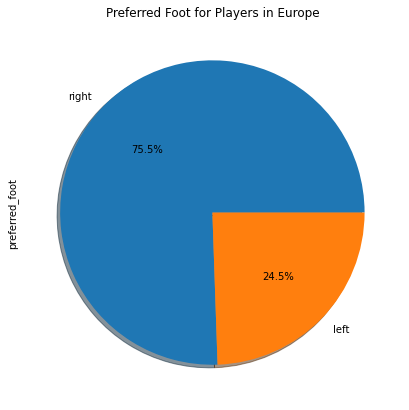

In [ ]:
# Let's plot this data to have more visualized look
left= df_players_combined.query('preferred_foot=="left"')
right= df_players_combined.query('preferred_foot=="right"')
df_players_combined['preferred_foot'].value_counts().plot.pie(autopct='%1.1f%%',startangle=0, shadow=True,figsize=(7,7)).set_title("Preferred Foot for Players in Europe");

This is pretty natural as in only about 1 player in 4 is left footed. Majority of players are right footed.

#### Question (2): What is the age distribution of all players in the datasets?

In [ ]:
# Moving on to the next exploration
# Let's explore the "age" data of the players
df_players_combined['age'].describe()

count    180354.000000
mean         25.161993
std           4.719768
min           7.000000
25%          22.000000
50%          25.000000
75%          28.000000
max          43.000000
Name: age, dtype: float64

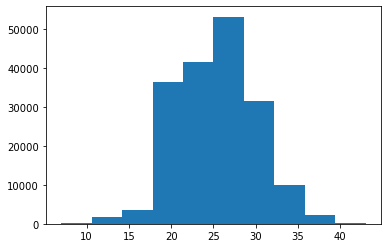

In [ ]:
# Visualizing the "age" distribution of all the players
plt.hist(df_players_combined['age']);

#### Now let's explore the effect of phiscyal attributes on the skills of each player

#### Question (3): Which physical attributes affect football skills?

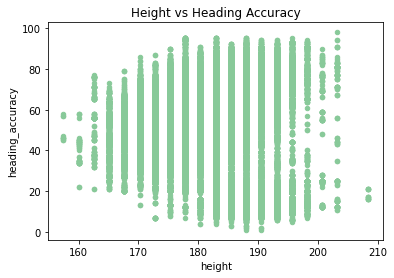

In [ ]:
df_players_combined.plot(x="height",y="heading_accuracy",kind="scatter",color = '#88c999').set_title("Height vs Heading Accuracy");

As it's shown, the more hieght of the player the more ability of heading accurately he gets.

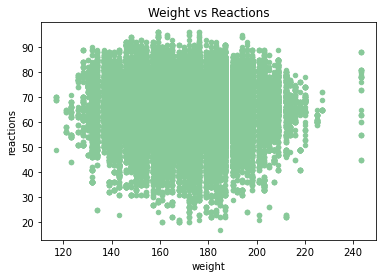

In [ ]:
df_players_combined.plot(x="weight",y="reactions",kind="scatter",color = '#88c999').set_title("Weight vs Reactions");

There's like a threshold weight (which is around 180) that above it, players' reactions get lower as they lose the ability to react well and efficiently

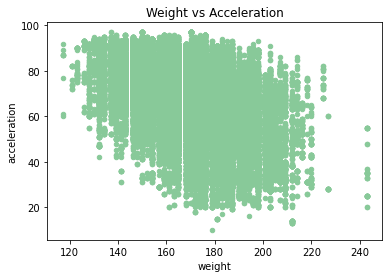

In [ ]:
df_players_combined.plot(x="weight",y="acceleration",kind="scatter",color = '#88c999').set_title("Weight vs Acceleration");

Logically, the more weight players gain, the less acceleration they can get

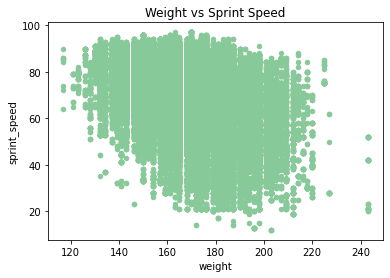

In [ ]:
df_players_combined.plot(x="weight",y="sprint_speed",kind="scatter",color = '#88c999').set_title("Weight vs Sprint Speed");

Also, the more weight players gain, the less sprint speed they can get whioch totally makes sense

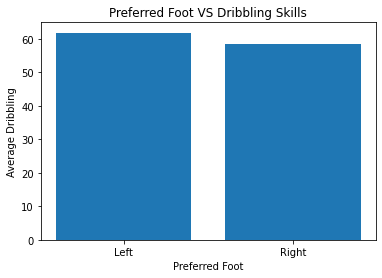

In [ ]:
# Now let's explore which players have the more dribbling skills (left footed or right footed)
drib_left=df_players_combined[(df_players_combined.preferred_foot=='left')].dribbling.mean()
drib_right=df_players_combined[(df_players_combined.preferred_foot=='right')].dribbling.mean()
plt.bar(["Left", "Right"], [drib_left, drib_right])
plt.title("Preferred Foot VS Dribbling Skills")
plt.xlabel("Preferred Foot")
plt.ylabel("Average Dribbling");

Left footed players are slightly better at driblling (even though they are the least number of players) which is understandable as they are the least predicted unlike the right footed players

#### Now let's explore the skills that are linked to ach other and their effect

#### Question (4): Which football skills are related to each other? And how are the related whether positively or negatively?

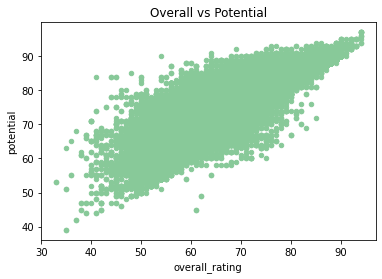

In [ ]:
df_players_combined.plot(x="overall_rating",y="potential",kind="scatter",color = '#88c999').set_title("Overall vs Potential");

This shows that most of the players with high potential turned out to be players with high overall rating

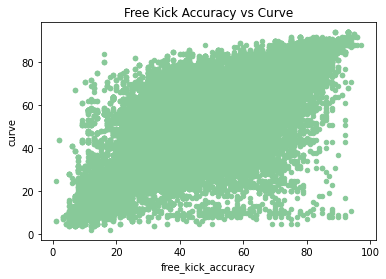

In [ ]:
df_players_combined.plot(x="free_kick_accuracy",y="curve",kind="scatter",color = '#88c999').set_title("Free Kick Accuracy vs Curve");

This shows that curve is an important skill for the free kick accuracy. However, some players can be great at free kicks without the curve skill.

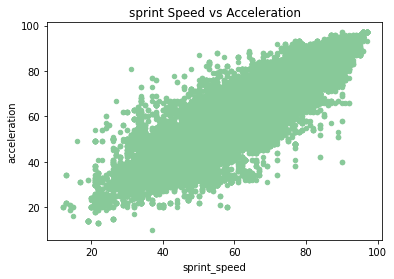

In [ ]:
df_players_combined.plot(x="sprint_speed",y="acceleration",kind="scatter",color = '#88c999').set_title("sprint Speed vs Acceleration");

Naturally, the acceleration is in linear correlation with the sprint speed

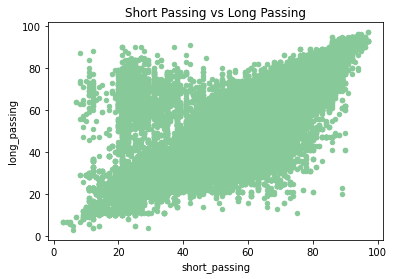

In [ ]:
df_players_combined.plot(x="short_passing",y="long_passing",kind="scatter",color = '#88c999').set_title("Short Passing vs Long Passing");

There are a lot of players who inspite of having high Long Passing skills have low Short Passing scores.

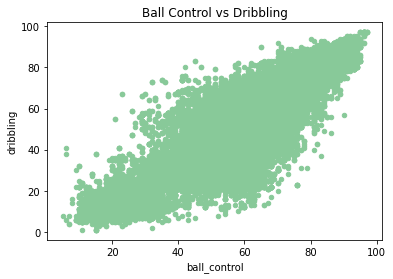

In [ ]:
df_players_combined.plot(x="ball_control",y="dribbling",kind="scatter",color = '#88c999').set_title("Ball Control vs Dribbling");

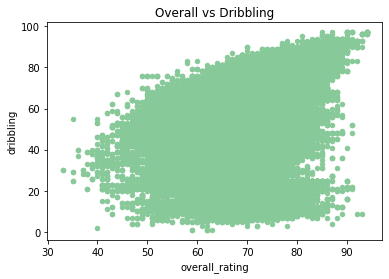

In [ ]:
df_players_combined.plot(x="overall_rating",y="dribbling",kind="scatter",color = '#88c999').set_title("Overall vs Dribbling");

Players with higher overall ratings tend to have more driblling skills which implicates the criticality of such skill in the soccer world

### Now let's explore the effect of age on players' skills

#### Question (5): How much does the age of players affect their skills that are based on physical health?

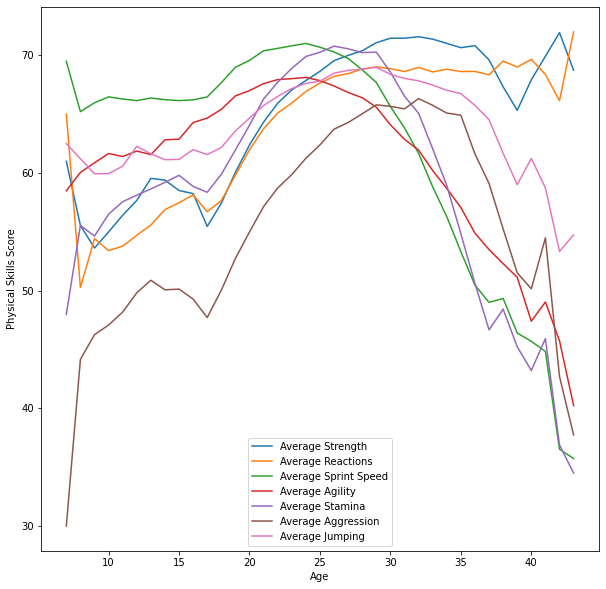

In [ ]:
# Visually exploring the effect of the age on players' skills
df_players_combined.groupby('age')['strength'].mean().plot(kind="line",figsize=(10,10),label='Average Strength');
df_players_combined.groupby('age')['reactions'].mean().plot(kind="line",figsize=(10,10),label='Average Reactions');
df_players_combined.groupby('age')['sprint_speed'].mean().plot(kind="line",figsize=(10,10),label='Average Sprint Speed');
df_players_combined.groupby('age')['agility'].mean().plot(kind="line",figsize=(10,10),label='Average Agility');
df_players_combined.groupby('age')['stamina'].mean().plot(kind="line",figsize=(10,10),label='Average Stamina');
df_players_combined.groupby('age')['aggression'].mean().plot(kind="line",figsize=(10,10),label='Average Aggression');
df_players_combined.groupby('age')['jumping'].mean().plot(kind="line",figsize=(10,10),label='Average Jumping');
plt.xlabel("Age");
plt.ylabel("Physical Skills Score");
plt.legend()
plt.show()

In this graph, it is clear that as the players get older the attributes which depend on the physical health of the player decreases.

### Now let's get more into the data of the advantages of each player

#### Question (6): Who is the player with the best overall rating?

In [ ]:
# Starting with the player of the best overall rating
df_players_combined.query('overall_rating==overall_rating.max()').iloc[:,[2,6,11,12,13]]

,player_name,height,overall_rating,potential,preferred_foot
102482,Lionel Messi,170.18,94.0,94.0,left
102483,Lionel Messi,170.18,94.0,94.0,left
102484,Lionel Messi,170.18,94.0,95.0,left
102491,Lionel Messi,170.18,94.0,97.0,left
102492,Lionel Messi,170.18,94.0,97.0,left
102493,Lionel Messi,170.18,94.0,97.0,left
102494,Lionel Messi,170.18,94.0,97.0,left
102495,Lionel Messi,170.18,94.0,97.0,left
102496,Lionel Messi,170.18,94.0,97.0,left
102497,Lionel Messi,170.18,94.0,96.0,left


So, apparently **Messi is the GOAT !**

#### Question (7): Who is the player with the best Potential?

In [ ]:
# Let's get with the player of the best potential
df_players_combined.query('potential==potential.max()').iloc[:,[2,6,11,12,13]]

,player_name,height,overall_rating,potential,preferred_foot
102491,Lionel Messi,170.18,94.0,97.0,left
102492,Lionel Messi,170.18,94.0,97.0,left
102493,Lionel Messi,170.18,94.0,97.0,left
102494,Lionel Messi,170.18,94.0,97.0,left
102495,Lionel Messi,170.18,94.0,97.0,left
102496,Lionel Messi,170.18,94.0,97.0,left


**The GOAT** once and again

#### Question (8): Who is the player who got the most penalties?

In [ ]:
# Let's get with the player who got the most penalties
df_players_combined.query('penalties==penalties.max()').iloc[:,[2,6,11,12,41]]

,player_name,height,overall_rating,potential,marking
149591,Rickie Lambert,187.96,75.0,75.0,30.0
149592,Rickie Lambert,187.96,75.0,75.0,30.0
149593,Rickie Lambert,187.96,75.0,75.0,30.0
149594,Rickie Lambert,187.96,75.0,75.0,30.0


#### Question (9): Who is the player that is the best at free kicks?

In [ ]:
# Let's get with the player who is the best at free kicks
df_players_combined.query('free_kick_accuracy==free_kick_accuracy.max()').iloc[:,[2,6,11,12,24]]

,player_name,height,overall_rating,potential,long_passing
92152,"Juninho Pernambucano,20",177.8,83.0,89.0,83.0


#### Question (10): Who is the fastest player?

In [ ]:
# Let's get with the fastest players (first with sprint speed)
df_players_combined.query('sprint_speed==sprint_speed.max()').iloc[:,[2,6,11,12,28,27]]

,player_name,height,overall_rating,potential,agility,sprint_speed
40183,David Odonkor,172.72,70.0,80.0,75.0,97.0
118395,Mathis Bolly,185.42,64.0,69.0,73.0,97.0
118396,Mathis Bolly,185.42,64.0,71.0,73.0,97.0
118397,Mathis Bolly,185.42,64.0,72.0,73.0,97.0
118398,Mathis Bolly,185.42,64.0,72.0,73.0,97.0
118399,Mathis Bolly,185.42,64.0,71.0,73.0,97.0
118400,Mathis Bolly,185.42,65.0,71.0,74.0,97.0
118401,Mathis Bolly,185.42,65.0,71.0,74.0,97.0
118402,Mathis Bolly,185.42,65.0,72.0,74.0,97.0
118403,Mathis Bolly,185.42,65.0,72.0,74.0,97.0


In [ ]:
# Let's get with the fastest players (Now with the acceleration)
df_players_combined.query('acceleration==acceleration.max()').iloc[:,[2,6,11,12,27,28]]

,player_name,height,overall_rating,potential,sprint_speed,agility
26998,Cedric,167.64,71.0,77.0,90.0,91.0
26999,Cedric,167.64,71.0,77.0,90.0,91.0
118391,Mathis Bolly,185.42,67.0,71.0,96.0,73.0
118392,Mathis Bolly,185.42,67.0,72.0,96.0,73.0
118393,Mathis Bolly,185.42,67.0,72.0,96.0,73.0
118394,Mathis Bolly,185.42,67.0,71.0,96.0,73.0
118395,Mathis Bolly,185.42,64.0,69.0,97.0,73.0
118396,Mathis Bolly,185.42,64.0,71.0,97.0,73.0
118397,Mathis Bolly,185.42,64.0,72.0,97.0,73.0
118398,Mathis Bolly,185.42,64.0,72.0,97.0,73.0


So, apparently **Mathis Bolly** is the only one who is the best at both sprint speed and acceleration

#### Question (11): Now let's get to the question of Cristiano or Messi?

Starting of with Cristiano Ronalod, let's explore the average scores of each skill for him

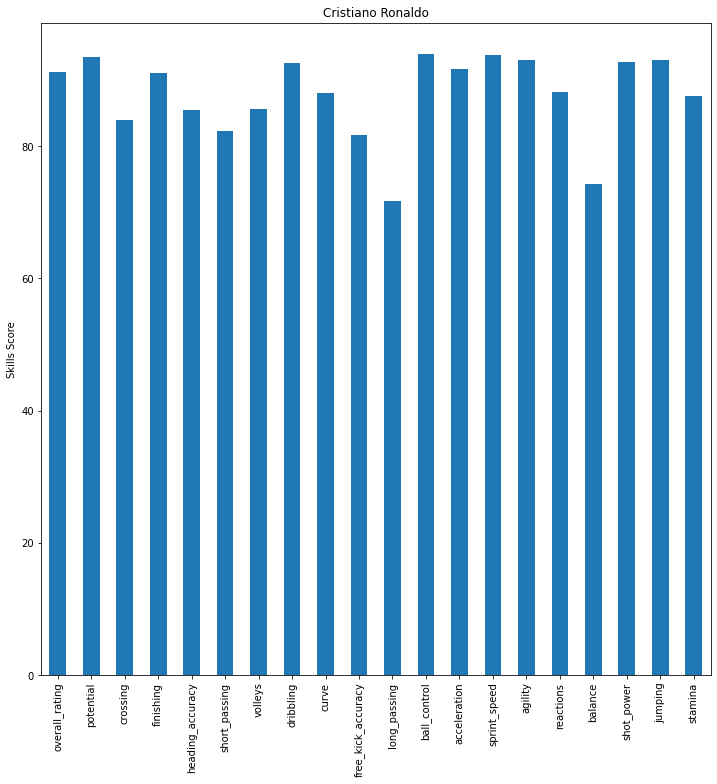

In [ ]:
cr7= df_players_combined.query('player_name=="Cristiano Ronaldo"').iloc[:,11:34]
cr7.drop(['preferred_foot','attacking_work_rate','defensive_work_rate'],axis=1,inplace=True)
cr7.mean().plot(kind='bar',figsize=(12,12),title='Cristiano Ronaldo');
plt.ylabel("Skills Score");
plt.show()

Moving on to Messi, let's see the average scores for skills

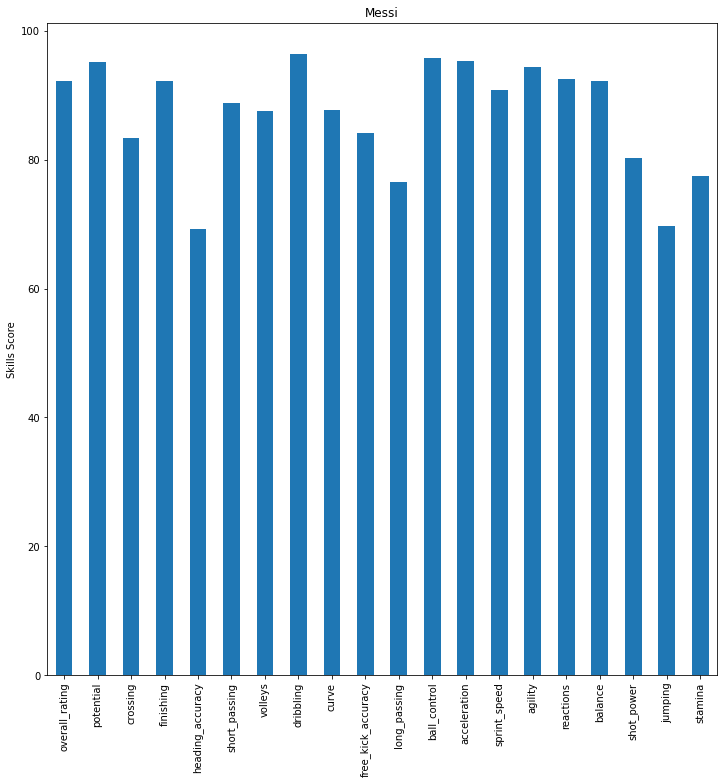

In [ ]:
messi=df_players_combined.query('player_name=="Lionel Messi"').iloc[:,11:34]
messi.drop(['preferred_foot','attacking_work_rate','defensive_work_rate'],axis=1,inplace=True)
messi.mean().plot(kind='bar',figsize=(12,12),title="Messi");
plt.ylabel("Skills Score");
plt.show()

#### Question(12): Who is the most player who had maximum variation in his overall rating?

In [ ]:
#Starting with creating datasets for maximum and minimum overall ratings for all players
high_rating=df_players_combined.groupby(['player_name'])['overall_rating'].max().to_frame()
low_rating=df_players_combined.groupby(['player_name'])['overall_rating'].min().to_frame()

In [ ]:
#Now let's check who has the greatest difference between his maximum and minimum overall rating
diff = high_rating.merge(low_rating, left_on='player_name', right_on='player_name', how='outer')
diff.insert(2, "Delta",diff.overall_rating_x-diff.overall_rating_y)
diff.query('Delta==Delta.max()')

,overall_rating_x,overall_rating_y,Delta
player_name,,,
Marco Reus,86.0,44.0,42.0


#### Now let's move to teams data in the biggest five leagues (English, Italian, Spanish, German and French)

In [ ]:
#Loading the dataset of all the countries
df_country=pd.read_csv('Country.csv')
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [ ]:
#Loading the dataset of all the leagues
df_league=pd.read_csv('League.csv')
df_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [ ]:
# Now let's merge both datasets in order to relate each country with its league
df_country_leagues = df_country.merge(df_league, left_on='id', right_on='id', how='inner')
df_country_leagues.head()

,id,name_x,country_id,name_y
0,1,Belgium,1,Belgium Jupiler League
1,1729,England,1729,England Premier League
2,4769,France,4769,France Ligue 1
3,7809,Germany,7809,Germany 1. Bundesliga
4,10257,Italy,10257,Italy Serie A


In [ ]:
# Now, let's rename the columns to get rid of x and y
df_country_leagues.rename(columns={"name_y": "League", "name_x": "Country"},inplace=True)
df_country_leagues.head()

,id,Country,country_id,League
0,1,Belgium,1,Belgium Jupiler League
1,1729,England,1729,England Premier League
2,4769,France,4769,France Ligue 1
3,7809,Germany,7809,Germany 1. Bundesliga
4,10257,Italy,10257,Italy Serie A


#### Now, let's get to the largest dataset of them all (Matches dataset)

In [ ]:
#let's load the data
df_matches=pd.read_csv('Match.csv')

#explore the null values within the dataset
df_matches.isnull().sum()

id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64

In [ ]:
#let's get rid of the null values
df_matches.dropna(inplace=True)

#let's re-check
df_matches.isnull().sum()

id            0
country_id    0
league_id     0
season        0
stage         0
             ..
GBD           0
GBA           0
BSH           0
BSD           0
BSA           0
Length: 115, dtype: int64

In [ ]:
#let's check for any duplicated values
df_matches.duplicated().sum()

0

In [ ]:
#let's merge the matches dataset with the leagues and countries dataset
df_scores = df_matches.merge(df_country_leagues, left_on='country_id', right_on='id', how='outer')
df_scores.head()

,id_x,country_id_x,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,GBH,GBD,GBA,BSH,BSD,BSA,id_y,Country,country_id_y,League
0,3249.0,1729.0,1729.0,2012/2013,1.0,2012-08-18 00:00:00,1228229.0,9825.0,8472.0,0.0,...,1.35,4.60,9.00,1.40,4.33,8.50,1729,England,1729,England Premier League
1,3250.0,1729.0,1729.0,2012/2013,1.0,2012-08-20 00:00:00,1228230.0,8668.0,10260.0,1.0,...,4.60,3.50,1.83,4.00,3.40,1.91,1729,England,1729,England Premier League
2,3251.0,1729.0,1729.0,2012/2013,1.0,2012-08-18 00:00:00,1228231.0,9879.0,9850.0,5.0,...,1.80,3.50,4.40,1.83,3.50,4.33,1729,England,1729,England Premier League
3,3252.0,1729.0,1729.0,2012/2013,1.0,2012-08-19 00:00:00,1228232.0,8456.0,8466.0,3.0,...,1.18,6.25,16.00,1.17,6.50,17.00,1729,England,1729,England Premier League
4,3253.0,1729.0,1729.0,2012/2013,1.0,2012-08-18 00:00:00,1228233.0,10261.0,8586.0,2.0,...,2.60,3.30,2.75,2.50,3.40,2.70,1729,England,1729,England Premier League


In [ ]:
#Let's get rid of any null values that might affect the analysis
df_scores.dropna(inplace=True)

In [ ]:
# Getting the total goals scored for all the home teams
home=df_scores.groupby(['Country'])['home_team_goal'].sum()

In [ ]:
# Getting the total goals scored for all the home teams
away=df_scores.groupby(['Country'])['away_team_goal'].sum()

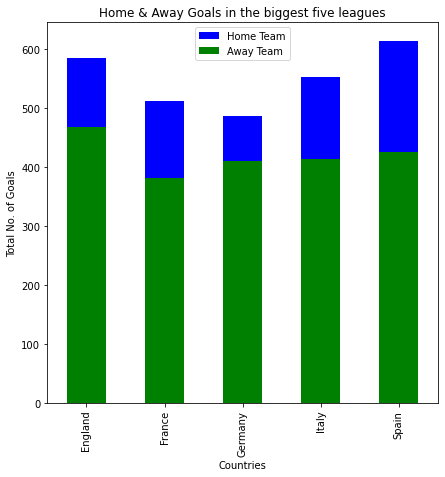

In [ ]:
#Plotting the data to compare goals scored by home and away teams
home.plot(kind="bar",figsize=(7,7),label='Home Team',color="Blue");
away.plot(kind="bar",figsize=(7,7),label='Away Team',color="Green");
plt.ylabel('Total No. of Goals')
plt.xlabel('Countries')
plt.title('Home & Away Goals in the biggest five leagues')
plt.legend()
plt.show()

> No surprises, home teams have advantage in scoring more goals than away teams.

Noting that both the Spanish League (La Liga) and the English League (EPL) are the most in goals scored.

<a id='conc'></a>
## Conclusions

>**Results:**  
The shown above analysis for our datasets concludes the following:  
1- Majority of players are right footed as only areound 25% are left footed.  
2- The average age of the players in the dataset is around 25 years old.  
3- Physical attributes of the players have great effect on their football skills scores either positively ore negatively.  
4- Many football skills are related to each other.  
5- Age has a negative effect on the physical related football skills like strength, stamina and so on.  
6- Messi is the best player in the world.  
7- Home teams have much advantage over the away teams in scoring goals.  
8- Both the Spanish League (La Liga) and the English League (EPL) are the most in goals scored.



>**Limitations:**  
The below issues hindered more efficient analysis process  
1- Some provided columns needed more interpretation as they were named in un clear way.  
2- Player's positions are provided in X-Y Coordinates instead of having the position names for easier processing.  
3- Some leagues' data that are provided are not of anyone's concers as for the swiss league.